# Python Programming Language for Data Analysis

In our earlier workshop we learned how to import third party libraries such as `pandas` and use it to analyze data. In the process, we learned many fundamental aspects of programming such as:

    - Variables and Data Types
    - Operators
    - Functions (User-defined functions, built-in functions, methods and third party functions)
    - Indexing and Extracting elements from a sequence
    
We also learned how to use many core aspects of `pandas` library:

    - How to import data in a csv file and get summary statistics for numeric and non-numeric columns
    - How to list functions available in pandas modules and review its use by consulting documentations online
    - How to filter rows and columns to get a desired subset of data
    - How to create new columns with desired values
    - How to group data based on one or multiple columns and get group-wise summary statistics
    - How to plot data to visualize trends over time
    
In this workshop, we will now use this knowledge to perform end-to-end data analysis. First, we will begin by answering the questions we have already solved, so that we can practice what we know. Then we will focus on how to use this data such that we can create a simple model that can predict XXX the ridership of the 79th route. For the latter we will utilize the `sklearn` package for machine learning in Python.

Let's begin by importing the libraries and data.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 

In [2]:
data = pd.read_csv(filepath_or_buffer="cta-ridership-original.csv")
data.head()

route             routename Month_Beginning  Avg_Weekday_Rides  \
0     1     Indiana/Hyde Park      01/01/2001             6982.6   
1     2     Hyde Park Express      01/01/2001             1000.0   
2     3            King Drive      01/01/2001            21406.5   
3     4         Cottage Grove      01/01/2001            22432.2   
4     6  Jackson Park Express      01/01/2001            18443.0   

   Avg_Saturday_Rides  Avg_Sunday-Holiday_Rides  MonthTotal  
0                 0.0                       0.0      153617  
1                 0.0                       0.0       22001  
2             13210.7                    8725.3      567413  
3             17994.0                   10662.2      618796  
4             13088.2                    7165.6      493926

Let's answer the following questions first:
1. Identify the 10 routes with highest number of ridership in total. Create a bar plot of total ridership of these top 10 routes. To create `bar` plot simple provide argument `bar` to the parameter `kind` of the `plot` method. 
2. Which route has the highest average ridership? Is it also the most popular route on Saturdays or on Sundays and Holidays? Why is the route so popular?
3. Group the data by year to figure out the yearly average trend of ridership over the years. Plot the yearly average of the average monthly total ridership value.
4. Now use the above grouped data to plot the average ridership during the weekdays, saturday and sunday/holidays by year.
5. Which routes have the highest difference in average ridership between weekdays and Saturdays?
6. Which routes have the highest difference in average ridership between weekdays and Sundays/Holidays?
7. Which routes have the most consistent average ridership between weekdays, Saturdays and Sundays/Holidays? i.e. are there any route that are not affected by the day of the week?

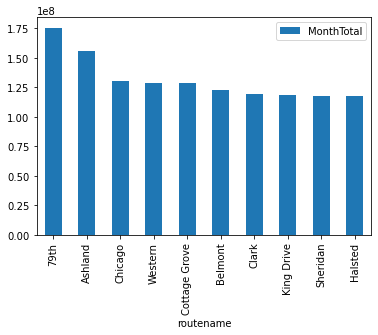

In [3]:
# 1. Identify the 10 routes with highest number of ridership in total. 
#    Create a bar plot of total ridership of these top 10 routes. 

routes_grouped = data[['routename','MonthTotal']].groupby('routename')   # created groupby object
monthtotal_byroutes = routes_grouped.sum()                               # get sum for each group in groupby object  
top10routes = monthtotal_byroutes.sort_values(by='MonthTotal', ascending=False)[:10] # sort and get the first 10 values

top10routes.plot(kind='bar')   # create a bar plot of the series with top 10 values along with the index                                       
plt.show()

In [4]:
# 2. Which route has the highest average ridership? 
#    Is it also the most popular route on Saturdays or on Sundays and Holidays? 
#    Why is the route so popular?


cols = [ 'Avg_Weekday_Rides','Avg_Saturday_Rides', 'Avg_Sunday-Holiday_Rides'] # create a list of columns to use

top10routes_byday = []  # initialize empty list to store results
for i in cols:          # iterate over each item of the list
    print(i)            # print the item
    routes_grouped = data[['routename', i]].groupby('routename') # ceate group byobject with routename and item in the loop
    total_byroutes = routes_grouped.sum()                        # get sum of each group
    top10routes = total_byroutes.sort_values(by=i, ascending=False)[:10] # sort and extract the first 10 items
    top10routes_byday.append(top10routes)                        # append the above result to the empty list

Avg_Weekday_Rides
Avg_Saturday_Rides
Avg_Sunday-Holiday_Rides


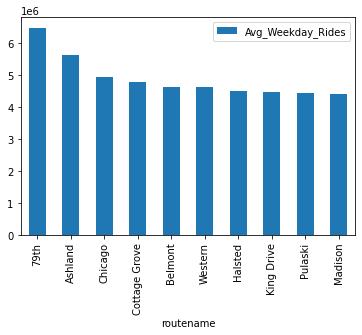

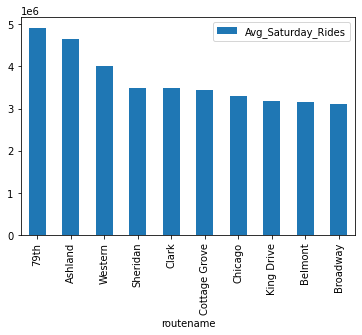

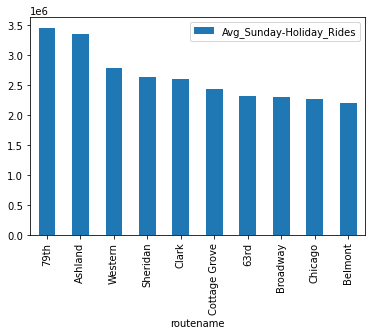

In [5]:
for i in top10routes_byday: # for each item in the list that now has result
    i.plot(kind='bar')      # create a bar plot 

In [6]:
# 4. Group the data by year to figure out the yearly average trend of ridership over the years. 
#    Plot the yearly average of the average monthly total ridership value.


data['Month_Beginning'] = pd.to_datetime(data['Month_Beginning'], format='%m/%d/%Y') # convert to datetime object
data['Month_Beginning_year'] = data['Month_Beginning'].dt.year                       # create new column with just year info

yearly_groups = data.iloc[:,3:8].groupby('Month_Beginning_year').mean()              # select a subset of data and create groupby object and calculate mean of each group
yearly_groups.head()                                                                 # show first five lines of the above dataframe

Avg_Weekday_Rides  Avg_Saturday_Rides  \
Month_Beginning_year                                          
2001                        7289.061917         4573.756116   
2002                        7206.850279         4548.055549   
2003                        6787.361841         4260.948153   
2004                        6539.225350         4221.471787   
2005                        6677.692582         4212.167280   

                      Avg_Sunday-Holiday_Rides     MonthTotal  
Month_Beginning_year                                           
2001                               3036.292182  189227.727617  
2002                               2994.784191  187113.878487  
2003                               2798.121381  175961.016959  
2004                               2779.293575  170907.525701  
2005                               2876.988787  173637.042553

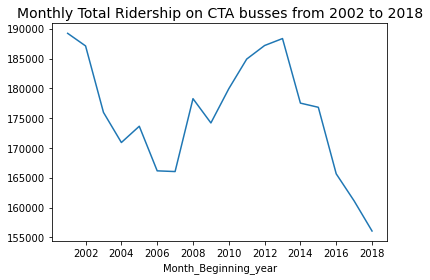

In [7]:
fig, ax = plt.subplots()                   # create plotting objects
yearly_groups['MonthTotal'].plot(ax=ax)    # plot a series of a dataframe and attach its axis to the plot object above
ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # set x-axis labels to integer
ax.set_title('Monthly Total Ridership on CTA busses from 2002 to 2018', # set title for the plot
             fontsize = 14) 
plt.show()                                 # display the plot

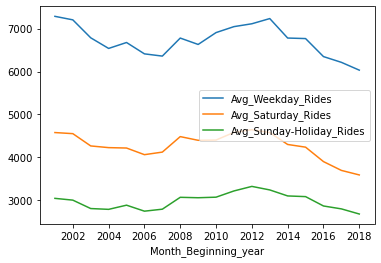

In [8]:
# 5. Now use the above grouped data to plot the average ridership during the weekdays, saturday and 
#    sunday/holidays by year.


fig, ax = plt.subplots()
yearly_groups.iloc[:,:-1].plot(ax=ax)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [9]:
# 6. Which routes have the highest difference in average ridership between weekdays and Saturdays? 
# 7. Which routes have the highest difference in average ridership between weekdays and Sundays/Holidays?


# create new columns that store differences in ridership among day types
data['diff_week_saturday'] = data['Avg_Weekday_Rides'] - data['Avg_Saturday_Rides']    # get difference of two columns of a dataframe
data['diff_week_sunday'] = data['Avg_Weekday_Rides'] - data['Avg_Sunday-Holiday_Rides']
data['diff_sat_sunday'] = data['Avg_Saturday_Rides'] - data['Avg_Sunday-Holiday_Rides']
data.head()

route             routename Month_Beginning  Avg_Weekday_Rides  \
0     1     Indiana/Hyde Park      2001-01-01             6982.6   
1     2     Hyde Park Express      2001-01-01             1000.0   
2     3            King Drive      2001-01-01            21406.5   
3     4         Cottage Grove      2001-01-01            22432.2   
4     6  Jackson Park Express      2001-01-01            18443.0   

   Avg_Saturday_Rides  Avg_Sunday-Holiday_Rides  MonthTotal  \
0                 0.0                       0.0      153617   
1                 0.0                       0.0       22001   
2             13210.7                    8725.3      567413   
3             17994.0                   10662.2      618796   
4             13088.2                    7165.6      493926   

   Month_Beginning_year  diff_week_saturday  diff_week_sunday  diff_sat_sunday  
0                  2001              6982.6            6982.6              0.0  
1                  2001              1000.0            1000.0              0.0  
2                  2001              8195.8           12681.2           4485.4  
3                  2001              4438.2           11770.0           7331.8  
4                  2001              5354.8           11277.4           5922.6

In [10]:
# select columns to work with
cols = [ 'diff_week_saturday','diff_week_sunday', 'diff_sat_sunday']

# create grouped dataframes for each day type and store results in a list
total_byroutes = []
for i in cols:
    print(i)
    routes_grouped = data[['routename', i]].groupby('routename')
    total_byroutes.append(routes_grouped.sum())
    
totaldiff_byroutes = pd.concat(total_byroutes, axis=1)    # convert a list of dataframe to single dataframe
totaldiff_byroutes.head()

diff_week_saturday
diff_week_sunday
diff_sat_sunday


diff_week_saturday  diff_week_sunday  diff_sat_sunday
routename                                                              
111th/King Drive            104286.6          142535.0          38248.4
16th/18th                   205568.8          269088.8          63520.0
31st                         12376.0           12376.0              0.0
31st/35th                   159550.3          213529.3          53979.0
35th                        340682.7          520450.8         179768.1

In [11]:
# create a function to get the top or bottom N items of a column with its index

def get_n_items(diff_col, N=10, sort_asc=True):
    if sort_asc:
        get_n = diff_col.abs().sort_values()[:N]  # get absolute value and then sort in ascending order and get first N items
    else:
        get_n = diff_col.abs().sort_values(ascending=False)[:N] # get absolute value and then sort in descending order and get first N items
        
    return get_n

In [12]:
# apply the function to all columns of the dataframe with difference information and 
# get top 10 routes
top10route_bydiff = totaldiff_byroutes.apply(get_n_items, sort_asc=False)
top10route_bydiff

diff_week_saturday  diff_week_sunday  diff_sat_sunday
79th                      1548851.2         3008064.0        1459212.8
Ashland                         NaN         2246509.6        1295046.1
Belmont                   1462054.1         2406277.3         944223.2
Chicago                   1634425.2         2666510.9        1032085.7
Clark                           NaN               NaN         874908.1
Cottage Grove             1346034.3         2344181.8         998147.5
Halsted                   1654565.8         2457469.9              NaN
Kimball-Homan             1500209.4         2267138.1              NaN
King Drive                      NaN         2392445.7        1122547.2
LaSalle                   1799238.0               NaN              NaN
Madison                   1632773.1         2491969.9         859196.8
Pulaski                   1369288.9         2296854.7         927565.8
Western                         NaN               NaN        1237324.4
Western Express           1361169.4               NaN              NaN

In [13]:
# apply the function to all columns of the dataframe with difference information and 
# get bottom 10 routes

bottom10route_bydiff = totaldiff_byroutes.apply(get_n_items)
bottom10route_bydiff 

diff_week_saturday  diff_week_sunday  \
69th-Garfield Express Shuttle               2148.6            4346.6   
Central/Sherman                              926.5            1260.8   
Cermak-Roosevelt Express                       NaN            1457.2   
Chicago Manufacturing Campus                2594.1            2651.5   
Chicago/Golf                                   NaN               NaN   
Cicero Express                                 NaN               NaN   
Clarendon/LaSalle Express                      NaN               NaN   
Clarendon/Michigan Express                     NaN               NaN   
Dan Ryan OWL Shuttle                        1265.4             162.0   
King Drive Express                             NaN               NaN   
LaSalle                                        NaN               NaN   
Pershing Shuttle                             393.0             350.0   
Pullman Shuttle                             1090.9            3754.5   
ROAD CALL                                      0.0               1.0   
Ridge/Grant                                    NaN               NaN   
Sedgwick                                       NaN               NaN   
Sheridan/LaSalle Express                       NaN               NaN   
South Pulaski Limited                          NaN               NaN   
Special Dest Signs                             3.1               3.1   
Touhy Supplement                               8.7              88.1   
U. of Chicago/Lakeview Express              2326.4               NaN   

                                diff_sat_sunday  
69th-Garfield Express Shuttle               NaN  
Central/Sherman                             NaN  
Cermak-Roosevelt Express                    NaN  
Chicago Manufacturing Campus                NaN  
Chicago/Golf                                0.0  
Cicero Express                              0.0  
Clarendon/LaSalle Express                   0.0  
Clarendon/Michigan Express                  0.0  
Dan Ryan OWL Shuttle                        NaN  
King Drive Express                          0.0  
LaSalle                                     0.0  
Pershing Shuttle                            NaN  
Pullman Shuttle                             NaN  
ROAD CALL                                   NaN  
Ridge/Grant                                 0.0  
Sedgwick                                    0.0  
Sheridan/LaSalle Express                    0.0  
South Pulaski Limited                       0.0  
Special Dest Signs                          NaN  
Touhy Supplement                            NaN  
U. of Chicago/Lakeview Express              NaN

In [14]:
# 8. Which routes have the most consistent average ridership between weekdays, Saturdays and Sundays/Holidays? 
#    i.e. are there any route that are not affected by the day of the week?

In [15]:
# Note that this questions relies on some assumption of what is considered to be "consistent"
# For out demonstration purpose any absolute difference within 5000 will be considered consistent

In [16]:
# create a function that returns rows from a given col that have values less than N
def consistency(col, N=5000):
    consistent_rows = col[col.abs()<=N].index
    return consistent_rows

In [17]:
# initialize list to store results
consistent_routes = [] 

# no. of columns 
ncol = totaldiff_byroutes.shape[1] 

# iterate over no. of columns and columns names
for i,j in zip(range(0,ncol) , totaldiff_byroutes.columns):
    
    # apply the above consistency function on all columns of the dataframe with difference values
    consistent_index = totaldiff_byroutes.apply(consistency)
    
    # take result for one column at a time and append to the initialized list
    consistent_routes.append(totaldiff_byroutes[j].loc[consistent_index[i]])

# convert a list of series into dataframe    
consistent_routes = pd.concat(consistent_routes, axis=1)
consistent_routes

diff_week_saturday  diff_week_sunday  \
69th-Garfield Express Shuttle              2148.6            4346.6   
Central/Sherman                            -926.5           -1260.8   
Cermak-Roosevelt Express                  -4163.2           -1457.2   
Chicago Manufacturing Campus               2594.1            2651.5   
Chinatown/Pilsen Shuttle                  -4229.5               NaN   
...                                           ...               ...   
West 65th                                     NaN               NaN   
West Cermak                                   NaN               NaN   
West Loop/South Loop                          NaN               NaN   
Westchester                                   NaN               NaN   
Western Express                               NaN               NaN   

                               diff_sat_sunday  
69th-Garfield Express Shuttle           2198.0  
Central/Sherman                         -334.3  
Cermak-Roosevelt Express                2706.0  
Chicago Manufacturing Campus              57.4  
Chinatown/Pilsen Shuttle               -1251.2  
...                                        ...  
West 65th                                  0.0  
West Cermak                                1.5  
West Loop/South Loop                       0.0  
Westchester                                0.0  
Western Express                         -203.8  

[76 rows x 3 columns]

### Pivot Table

The popular Pivot Table feature of Excel can also be replicated in `pandas` using the `pivot_table` method. The  method takes the data to pivot, the column in the data that should be the row of the pivot table, the column(s) that will be the columns of the pivot table, the value to aggregate and the function to use for aggregation. 

In [18]:
data['Month_Beginning_month'] = data['Month_Beginning'].dt.month
ridership_overtime = pd.pivot_table(data=data.iloc[:,1:], 
                                    index=['Month_Beginning_year'], 
                                    columns=['Month_Beginning_month'],
                                    values=['MonthTotal'],
                                    aggfunc=np.mean)
ridership_overtime

MonthTotal                                \
Month_Beginning_month             1              2              3    
Month_Beginning_year                                                 
2001                   191682.569231  180008.114504  202056.333333   
2002                   186997.113636  178375.167939  187451.431818   
2003                   179165.701493  168556.231343  181676.970370   
2004                   163615.028777  162704.900000  181756.892857   
2005                   161472.569444  165635.729167  178743.951389   
2006                   159650.793103  158469.262069  181230.143836   
2007                   158595.183007  142559.398693  175356.618421   
2008                   161955.807947  161156.598684  172276.427632   
2009                   164051.013158  164146.125000  182435.556291   
2010                   168908.081081  161130.597315  192687.568345   
2011                   174595.215827  163577.877698  198571.268116   
2012                   178384.782609  185859.107914  201808.231884   
2013                   192483.614173  184558.724409  200014.779528   
2014                   160137.598425  168318.484375  190071.007812   
2015                   167105.401575  162483.218750  191411.456693   
2016                   158483.715385  165692.449612  178756.192308   
2017                   153340.905512  154858.796875  173420.598425   
2018                   150500.055118  144171.562500  164127.173228   

                                                                    \
Month_Beginning_month             4              5              6    
Month_Beginning_year                                                 
2001                   189006.106061  200182.601504  187035.924812   
2002                   190126.901515  195393.708955  180937.801471   
2003                   179275.511111  184536.043796  171917.528571   
2004                   171816.617021  171949.531469  171766.465278   
2005                   178096.659722  176994.794521  172665.896552   
2006                   162986.267123  177722.168919  163903.105960   
2007                   162704.558442  177779.316129  164675.909091   
2008                   184973.980392  187152.207792  178615.116883   
2009                   174261.921053  179606.483660  171605.857143   
2010                   185029.442857  181874.723404  180938.428571   
2011                   182876.115108  188321.935714  187221.913669   
2012                   185649.057971  193856.321429  184229.050000   
2013                   202087.653543  197548.592593  183551.007407   
2014                   183523.700787  190023.343750  172813.085938   
2015                   183556.196850  182984.210938  179720.359375   
2016                   165915.323077  170133.030769  166340.553846   
2017                   157605.834646  169127.325581  162655.279070   
2018                   159991.511811  165849.007752  153758.015504   

                                                                    \
Month_Beginning_month             7              8              9    
Month_Beginning_year                                                 
2001                   185020.507576  184324.962406  184282.171642   
2002                   184205.235294  185049.191176  193105.808824   
2003                   177907.066667  169338.891304  180159.774648   
2004                   166555.993007  162190.280822  179752.808219   
2005                   166595.317241  172662.727891  186046.816327   
2006                   158669.520270  161644.835526  169699.493421   
2007                   163282.642857  165791.522581  170422.019231   
2008                   187269.171053  182051.230263  189574.123377   
2009                   174963.254902  167717.474026  180726.227273   
2010                   178714.550000  182715.707143  189212.482270   
2011                   178593.742857  189062.758865  193413.929078   
2012                   180039.690647  189745.794326  186888.659574   
2013                   183128.4370

Additional features are available in the `pivot_table` function such as filling-in the missing values in the data, which is set to NaN by default. Refer to the [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html) for usage. 

Now, with the above data, we can create a plot such that we can see the ridership trend of each month over the years. In order to automatically generate the names of the month we can use the `datetime` module

In [19]:
import datetime as dt #move up

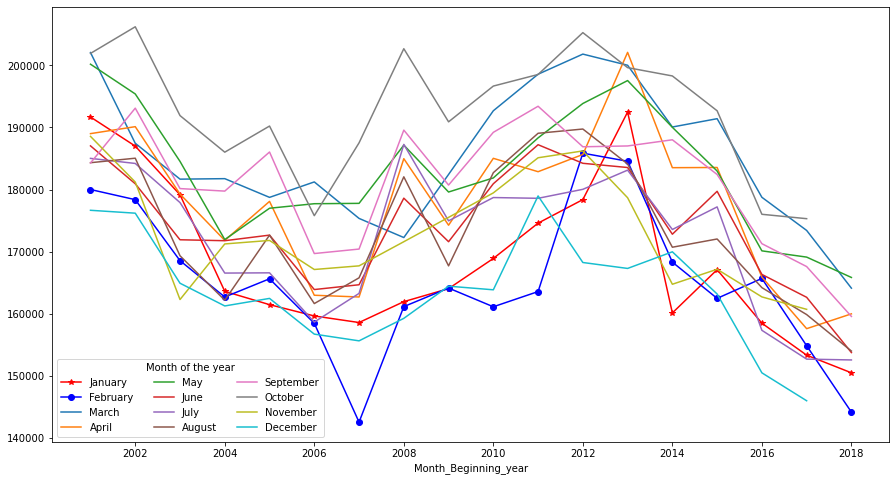

In [20]:
months = [dt.date(2022, m, 1).strftime('%B') for m in range(1, 13)] # generate names of the months of a year
fig, ax = plt.subplots(figsize=(15,8))
ridership_overtime.plot(kind='line', style=['r*-','bo-'], ax=ax) # added style for some line so that we can get distinct lines
plt.legend(months, ncol=3, loc='lower left', title='Month of the year',) # show legend in 3 columns
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

### Modelling the Data

Now that we have explored the data and we can now focus on modelling the data. There are many ways to model the data and the best way really depends on the problem you are trying to solve. Let's say for example, we want to know if it is possible to use the information of the ridership on Weekdays and Saturdays to predict the ridership on Sundays and Holidays.

**Note:** Obviously, ridership on Sundays and Holidays are dependent of many other factors besides ridership on Weekdays and Saturday. The modelling is for the purposed of demonstration only. 

The first part of modelling the data is that the data must be clean and any item in the data must be numeric. This is because machine learning models or statistical models in general do not take data that have textual values or missing values. So such data must be processed and transformed to some reasonable numeric representation before they are used in modelling. 

In our example, we will be using the two numeric columns and they have no missing data as identified above, we are ready to use this data. We will begin by separating the variables that will be predicted and the variables that will be use to predict. The former is commonly refered to as target (y) and the latter as features (X).

In [21]:
X = data[['Avg_Weekday_Rides','Avg_Saturday_Rides']]
y = data['Avg_Sunday-Holiday_Rides']

In [22]:
X.head()

Avg_Weekday_Rides  Avg_Saturday_Rides
0             6982.6                 0.0
1             1000.0                 0.0
2            21406.5             13210.7
3            22432.2             17994.0
4            18443.0             13088.2

In [23]:
y[:5]

0        0.0
1        0.0
2     8725.3
3    10662.2
4     7165.6
Name: Avg_Sunday-Holiday_Rides, dtype: float64

Next, we will split the feature data into training and test set. This is while we use data to train a machine learning model, its performance should be reported on a data that the model has never seen before. This ensure that the model is able to generalize i.e. it has not just learned the training data very well but also some patterns that can help predict future data points. This is very important if we want to use the model in the real world.

Usually a 70-30 or 80-20 split is recommended. In our case we will keep 3/4 of the data for training and 1/4 for testing. let's import the `train_test_split` function availablel via the `model_selection` submodule of `sklearn` library. This function takes the feature and target data and give us the desired splits of the data. 

In [24]:
from sklearn.model_selection import train_test_split as tts

In [25]:
X_train, X_test, y_train, y_test = tts(X,              # feature data
                                       y,              # target data 
                                       test_size=.25,  # size of the test set
                                       random_state=42)# set a random number to get the exact split next time 

In [26]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22155, 2) (7386, 2) (22155,) (7386,)


You can see that 1/4 of the data for both features and target are now separated as the test set. 

Let's now import the `Linear_Regression` model from the `linear_model` submodule of `sklearn`, which we will use to fit our data.

In [27]:
from sklearn.linear_model import LinearRegression

Most of the functions in sklearn can be used in the same way:

1. Create an instance of the object in use.
2. Use `fit` or `fit_transform` method to fit or transform the data as needed. 

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

Now that the data has been fit to the linear model, some model property information will now be available in the `model` object. One of these properties is the `score` method, which return the coefficient of determination of the prediction, also known as R squared. It is the proportion of the variation in the dependent variable that is predictable form the independent variable. We can input the training data to get this score.

Other properties of interest are the intercept of the and the coefficients for the linear regression model. We can get these information with the `intercept_` and `coef_` methods respectively.

In [29]:
# return the coefficient of determination of the prediction
model.score(X_train, y_train)

0.9806878464719238

In [30]:
model.intercept_

-50.08987832067169

In [31]:
model.coef_

array([-0.00808142,  0.71893902])

While the model R Squared value looks good, this value only measures the fit of training data to the model. How well will this model perform on an unseen test data is the next step of evaluation. Regression models often use the mean squared error metric to evaluate the performance on an unseen data. To calculate this we can use `mean_squared_error` function available throuhg the `metrics` submodule of `sklearn`. The function takes the model prediction on a given data and the actual target value for that dataset. Therefore, we first need to generate predictions from our model on the test set using the `predict` method.

In [32]:
from sklearn.metrics import mean_squared_error as mse

In [33]:
y_pred_test = model.predict(X_test)
mse_lrmodel = mse(y_pred_test, y_test)
print(mse_lrmodel)

258826.95917043873


How do we know this is a good enough value?

In machine learning, we usually have benchmark model against which we can test the performance. In this case we only have one model, so we can create another model and see which one performs better. 

We can repeat what we did earlier on another model or we can create a for-loop such that the exact same operation goes through all the models in a list. This latter is obviously better as we do not have to write the same code over and over again. It is also easier from readability perspective.

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
# initialize an empty list to add sklearn model objects
models = []

# add the sklearn model objects to the list one by one
# while adding the model also give it a name so put the name and model in a tuple
models.append(('LR', LinearRegression())) 
models.append(('DT', DecisionTreeRegressor())) # Ensemble method - collection of many decision trees
models

[('LR', LinearRegression()), ('DT', DecisionTreeRegressor())]

In [36]:
scores = {}
for name, model in models:
    print(model)
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    mse_score = mse(y_pred_test, y_test)
    scores[name] = mse_score
scores

LinearRegression()
DecisionTreeRegressor()


{'LR': 258826.95917043873, 'DT': 491242.7129623926}

Note that the Decision Tree Regression model has lower mean squared error than the Linear Regression model and therefore, is better.

It might also be a good idea to store the fitted model, so that once you can explore more details of the model rather than just the scores. See [here](https://scikit-learn.org/stable/modules/tree.html#tree-regression) to learn more about decision tree model properties and sklearn features available to explore the model details.

### Adding Categorical Features to our Model

The above model does not have the information about the ridership pattern specific to a route. So, adding this information might help predict the Sunday-Holiday ridership behavior better. 

There are two ways we can continue further: 
1. Isolate data for each route and repeat the above modelling process on that subset.
2. Add the routenames to features and create a model in which case we must convert the text to numeric values.

Let's try the first option on one route.

In [37]:
oneroute = data[data['routename']=='16th/18th']
oneroute.head()

route  routename Month_Beginning  Avg_Weekday_Rides  Avg_Saturday_Rides  \
14     18  16th/18th      2001-01-01             1923.8               898.5   
144    18  16th/18th      2001-02-01             2075.4               896.8   
275    18  16th/18th      2001-03-01             1717.8               979.8   
407    18  16th/18th      2001-04-01             1685.9              1003.6   
539    18  16th/18th      2001-05-01             1662.6               957.6   

     Avg_Sunday-Holiday_Rides  MonthTotal  Month_Beginning_year  \
14                      642.3       49130                  2001   
144                     618.7       47570                  2001   
275                     710.8       45533                  2001   
407                     732.2       43079                  2001   
539                     757.3       44194                  2001   

     diff_week_saturday  diff_week_sunday  diff_sat_sunday  \
14               1025.3            1281.5            256.2   
144              1178.6            1456.7            278.1   
275               738.0            1007.0            269.0   
407               682.3             953.7            271.4   
539               705.0             905.3            200.3   

     Month_Beginning_month  
14                       1  
144                      2  
275                      3  
407                      4  
539                      5

In [38]:
def create_model(target_features_data, targetname, models):
    
    y = target_features_data[targetname]
    X = target_features_data.drop(targetname, axis=1)
    print(X.shape, y.shape)
    
    X_train, X_test, y_train, y_test = tts(X, y, test_size=1/4, random_state=42)

    scores = {}
    for name, model in models:
        print(f'fitting model: {model}')
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        mse_score = mse(y_pred_test, y_test)
        scores[name] = mse_score
        
    return scores

In [39]:
cols = ['Avg_Sunday-Holiday_Rides', 'Avg_Weekday_Rides','Avg_Saturday_Rides']
scores_oneroute = create_model(oneroute[cols], 'Avg_Sunday-Holiday_Rides', models)
scores_oneroute

(213, 2) (213,)
fitting model: LinearRegression()
fitting model: DecisionTreeRegressor()


{'LR': 27684.616857695066, 'DT': 54773.207407407404}

Let's now try option 2 where we add the categorical feature routename to our model.

What are the ways to convert categorical feature into numeric values? There are many. One popular method is to create a new column for each categorical variable and fill in value 1 for the specified routename column if the row belongs to that routename. This process is also called creating dummy variable.

Pandas has an easy way to create dummy variables using the `get_dummies` method. Let's apply that on a toy dataset to see what transformation is taking place.

In [40]:
# create toy data set with categorica and numeric features
test_data = pd.DataFrame( [['apple', 2], ['orange', 5]], columns=['fruits', 'quantity'])
test_data.head()

fruits  quantity
0   apple         2
1  orange         5

In [41]:
# create dummy variables for a categorical column
pd.get_dummies(test_data['fruits'])

apple  orange
0      1       0
1      0       1

In [42]:
# combine the dummy variables with remaining numeric column of the original data
pd.concat([pd.get_dummies(test_data['fruits']), test_data['quantity']], axis=1)

apple  orange  quantity
0      1       0         2
1      0       1         5

The above transformation can also be done via `OneHotEncoder` function available through the `preprocessing` submodule of `sklearn`. This method is easier to use if you have many categorical columns. Here, we will see an example on our toy data set.

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
# 1. create an instance of the one hot encoder object
ohe = OneHotEncoder()

# 2. fit the data to the one hot encoder instance
ohe.fit_transform(test_data['fruits'].values.reshape(-1,1)) # require the input data to be 2-dimensional

<2x2 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

The resulting object is a sparse matrix, which cannot be combined to a `dataframe`. Therefore, we must first convert it to a numpy `array` for which there is a `toarray` method provided.

In [45]:
# 3. convert the transformed data to an numpy array 
dummy_fruits = ohe.fit_transform(test_data['fruits'].values.reshape(-1,1)).toarray()
dummy_fruits

array([[1., 0.],
       [0., 1.]])

Numpy `array` can be easily converted to a pandas `dataframe`.

In [46]:
# 4. transform the numpy array to dataframe
pd.DataFrame(dummy_fruits)

0    1
0  1.0  0.0
1  0.0  1.0

Note that we are missing the column names, which can make it difficult to know which category the column belongs to. This can be easily retrieved using the `categories_` method of the `OneHotEncoder` object. 

In [47]:
# while converting to dataframe add column names as well
pd.DataFrame(dummy_fruits, columns=ohe.categories_)

apple orange
0   1.0    0.0
1   0.0    1.0

Now, let's try this on routenames column of our dataset and see if adding this feature to the model helps predict better.

In [48]:
ohe = OneHotEncoder()
dummy_routename = ohe.fit_transform(data['routename'].values.reshape(-1,1)).toarray()
dummy_routename = pd.DataFrame(dummy_routename, columns=ohe.categories_)
dummy_routename.head()

111th/King Drive 16th/18th 31st 31st/35th 35th 43rd 47th 51st 55th/Austin  \
0              0.0       0.0  0.0       0.0  0.0  0.0  0.0  0.0         0.0   
1              0.0       0.0  0.0       0.0  0.0  0.0  0.0  0.0         0.0   
2              0.0       0.0  0.0       0.0  0.0  0.0  0.0  0.0         0.0   
3              0.0       0.0  0.0       0.0  0.0  0.0  0.0  0.0         0.0   
4              0.0       0.0  0.0       0.0  0.0  0.0  0.0  0.0         0.0   

  55th/Narragansett  ... West 65th West 95th West Cermak West Lawrence  \
0               0.0  ...       0.0       0.0         0.0           0.0   
1               0.0  ...       0.0       0.0         0.0           0.0   
2               0.0  ...       0.0       0.0         0.0           0.0   
3               0.0  ...       0.0       0.0         0.0           0.0   
4               0.0  ...       0.0       0.0         0.0           0.0   

  West Loop/South Loop Westchester Western Western Express  \
0                  0.0         0.0     0.0             0.0   
1                  0.0         0.0     0.0             0.0   
2                  0.0         0.0     0.0             0.0   
3                  0.0         0.0     0.0             0.0   
4                  0.0         0.0     0.0             0.0   

  Wilson/Michigan Express Wrigley Field Express  
0                     0.0                   0.0  
1                     0.0                   0.0  
2                     0.0                   0.0  
3                     0.0                   0.0  
4                     0.0                   0.0  

[5 rows x 189 columns]

In [49]:
cols = ['Avg_Sunday-Holiday_Rides', 'Avg_Weekday_Rides','Avg_Saturday_Rides']
target_features_data = pd.concat([data[cols], dummy_routename], axis=1)
scores_routename = create_model(target_features_data, 'Avg_Sunday-Holiday_Rides' , models)
scores_routename

(29541, 191) (29541,)
fitting model: LinearRegression()
fitting model: DecisionTreeRegressor()


{'LR': 171772.43965343578, 'DT': 293345.00101623515}

In [50]:
scores

{'LR': 258826.95917043873, 'DT': 491242.7129623926}

Clearly, the non-linear modelling fit suits the data and the problem better and adding the routename information helps both linear and non-linear model perform better. 

## Exercise 1:
Create yet another model that has all features of the best model so far and add the additional information from the "Month_Beginning_year" column. Does adding this information increase predictability?

In [51]:
ohe = OneHotEncoder()
dummy_year = ohe.fit_transform(data['Month_Beginning_year'].values.reshape(-1,1)).toarray()
dummy_year = pd.DataFrame(dummy_year, columns=ohe.categories_)

cols = ['Avg_Sunday-Holiday_Rides', 'Avg_Weekday_Rides','Avg_Saturday_Rides']
target_features_data = pd.concat([data[cols], dummy_routename, dummy_year], axis=1)
scores_routename_year = create_model(target_features_data, 'Avg_Sunday-Holiday_Rides' , models)
scores_routename_year

(29541, 209) (29541,)
fitting model: LinearRegression()
fitting model: DecisionTreeRegressor()


{'LR': 159713.08129798513, 'DT': 262424.8163688435}

## Exercise 2:
Create yet another model that has all features of the best model so far and add the additional information from the "Month_Beginning_month" column. Does adding this information increase predictability?

In [52]:
ohe_month = OneHotEncoder()
dummy_month = ohe_month.fit_transform(data['Month_Beginning_month'].values.reshape(-1,1)).toarray()
dummy_month = pd.DataFrame(dummy_month, columns=ohe_month.categories_)

cols = ['Avg_Sunday-Holiday_Rides', 'Avg_Weekday_Rides','Avg_Saturday_Rides']
target_features_data = pd.concat([data[cols], dummy_routename, dummy_year, dummy_month], axis=1)
scores_routename_yymm = create_model(target_features_data, 'Avg_Sunday-Holiday_Rides' , models)
scores_routename_yymm

(29541, 221) (29541,)
fitting model: LinearRegression()
fitting model: DecisionTreeRegressor()


{'LR': 144173.77290807283, 'DT': 213950.96260628215}